In [54]:

import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('stopwords') #removal of common and unuseful information/words 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianwaddell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd 

movie_df=pd.read_csv('imdb.csv')
movie_df

Review  Rating  Sentiment
0      Kurt Russell's chameleon-like performance, cou...      10          1
1      It was extremely low budget(it some scenes it ...       8          1
2      James Cagney is best known for his tough chara...       8          1
3      Following the brilliant "Goyôkiba" (aka. "Hanz...       8          1
4      One of the last classics of the French New Wav...      10          1
...                                                  ...     ...        ...
49995  (spoiler) it could be the one the worst movie ...       4          0
49996  So, you've seen the Romero movies, yes? And yo...       1          0
49997  Just listen to the Broadway cast album and to ...       3          0
49998  I have been a fan of the Carpenters for a long...       3          0
49999  Set in 1945, Skenbart follows a failed Swedish...       1          0

[50000 rows x 3 columns]

In [5]:
def text_clean(text):

 html_tag = '<br />'
 text = text.replace(html_tag, '')# removal of html tag
 text = re.sub(r'[^\w\s]', '', str(text)) #code cleans speical chars 
 text = text.lower() #convert to lowercase 
 text = [word for word in text.split() if word not in stopwords.words('english')] #function to join text if word not in stopwords list 
 text = ' '. join(text)
    

 return text 

In [6]:
test_str = " ! Hello wor7lD , is meSSage&&8HOUG LOWER $& ! with spe%ical Chara to CLEAN?"
text_clean(test_str)

'hello wor7ld message8houg lower speical chara clean'

In [7]:
movie_df['Review'] = movie_df['Review'].apply(text_clean) #applying text editor to review section 

In [8]:
movie_df

Review  Rating  Sentiment
0      kurt russells chameleonlike performance couple...      10          1
1      extremely low budgetit scenes looks like recor...       8          1
2      james cagney best known tough characters gangs...       8          1
3      following brilliant goyôkiba aka hanzo razor s...       8          1
4      one last classics french new wave direction ci...      10          1
...                                                  ...     ...        ...
49995  spoiler could one worst movie see might like l...       4          0
49996  youve seen romero movies yes youve seen jacobs...       1          0
49997  listen broadway cast album voices barbara harr...       3          0
49998  fan carpenters long time read biography watche...       3          0
49999  set 1945 skenbart follows failed swedish book ...       1          0

[50000 rows x 3 columns]

In [9]:
movie_df['Review']

0        kurt russells chameleonlike performance couple...
1        extremely low budgetit scenes looks like recor...
2        james cagney best known tough characters gangs...
3        following brilliant goyôkiba aka hanzo razor s...
4        one last classics french new wave direction ci...
                               ...                        
49995    spoiler could one worst movie see might like l...
49996    youve seen romero movies yes youve seen jacobs...
49997    listen broadway cast album voices barbara harr...
49998    fan carpenters long time read biography watche...
49999    set 1945 skenbart follows failed swedish book ...
Name: Review, Length: 50000, dtype: object

In [10]:
from nltk import word_tokenize, pos_tag, pos_tag_sents

texts = movie_df['Review'].tolist()

tagged_t = pos_tag_sents(map(word_tokenize, texts)) 

tagged_t 


[[('kurt', 'NN'),
  ('russells', 'NNS'),
  ('chameleonlike', 'JJ'),
  ('performance', 'NN'),
  ('coupled', 'VBD'),
  ('john', 'NN'),
  ('carpenters', 'NNS'),
  ('flawless', 'VBP'),
  ('filmmaking', 'VBG'),
  ('makes', 'VBZ'),
  ('one', 'CD'),
  ('without', 'IN'),
  ('doubt', 'NN'),
  ('one', 'CD'),
  ('finest', 'JJS'),
  ('boobtube', 'NN'),
  ('bios', 'NNS'),
  ('ever', 'RB'),
  ('aired', 'VBD'),
  ('holds', 'VBZ'),
  ('emotional', 'JJ'),
  ('foundation', 'NN'),
  ('strong', 'JJ'),
  ('enough', 'RB'),
  ('itll', 'NN'),
  ('never', 'RB'),
  ('age', 'NN'),
  ('carpenter', 'NN'),
  ('preserved', 'VBD'),
  ('posterity', 'NN'),
  ('power', 'NN'),
  ('ultimate', 'JJ'),
  ('poignancy', 'NN'),
  ('life', 'NN'),
  ('one', 'CD'),
  ('king', 'NN'),
  ('rock', 'NN'),
  ('roll', 'NN'),
  ('id', 'NN'),
  ('borderline', 'NN'),
  ('elvis', 'NN'),
  ('fan', 'NN'),
  ('life', 'NN'),
  ('wasnt', 'NN'),
  ('saw', 'VBD'),
  ('mindblowingly', 'RB'),
  ('moving', 'VBG'),
  ('movie', 'NN'),
  ('looked', 'VBD'

In [11]:
from nltk.stem.porter import PorterStemmer # word stemmer based on porter stemming algo

porterstemmer = PorterStemmer()

def steming(message):
    return[porterstemmer.stem(word) for word in message.split()]


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=steming) # here stemming is our user defined function as above 

X = tfidf.fit_transform(movie_df['Review'])
y = movie_df['Sentiment'].values

In [13]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1, test_size= 0.5, shuffle= True)

In [14]:
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [15]:
#Here we are classifying the train data 

clf.score(X_train, y_train)

0.93316

In [16]:
#also classification score of test data 

clf.score(X_test, y_test)

0.88744

In [17]:
#prediction on train data 

predictionY = clf.predict(X_train)

predictionY

array([1, 0, 1, ..., 0, 1, 1])

In [18]:
Y_hat = clf.predict(X_test)

Y_hat

array([1, 0, 1, ..., 1, 0, 1])

In [19]:
from sklearn.metrics import confusion_matrix, classification_report 
import itertools 
# function to create the confusion matrix 

def plot_matrix (cmatrix, classes, normalized= False, title= "Movie_Matrix", cmap= plt.cm.Blues): 
    
    plt.imshow(cmatrix, interpolation= 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    if normalized: 
        cmatrix = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
        print("Printed is the completed confusion matrix with normailization")
    else: 
            print('confusion matrix, without normalization')
        
        
    fmt = '.2f' if normalized else 'd'
    thresh = cm.max()/2 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i,j], fmt))
        horizontalalignment= 'center', 
        color='white' if cmatrix[i, j]> thresh else 'purple'
        
        plt.tight_layout()
        plt.ylabel('Real label')  
        plt.xlabel('predicted results')
                    

confusion matrix, without normalization
Printed is the completed confusion matrix with normailization
confusion matrix, without normalization
Printed is the completed confusion matrix with normailization


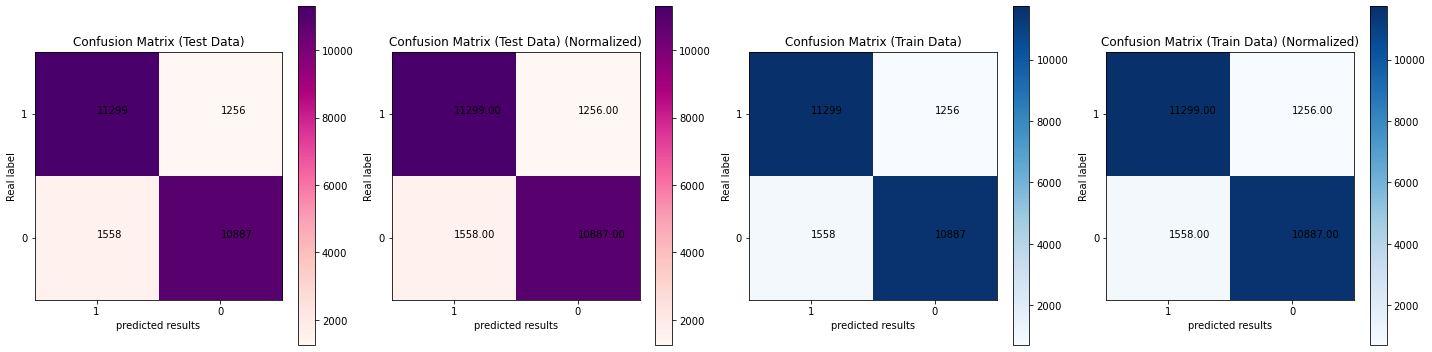

In [22]:
cm = confusion_matrix(y_test, Y_hat, labels=[1,0])
cm2 = confusion_matrix(y_train, predictionY, labels=[1,0])
#creating a confusion matrix to show results 

plt.figure(figsize=(20,5))
plt.subplot(141)
plot_matrix(cm, classes=[1,0], normalized= False, title='Confusion Matrix (Test Data)', cmap='RdPu')
plt.subplot(142)
plot_matrix(cm, classes=[1,0], normalized= True, title='Confusion Matrix (Test Data) (Normalized)', cmap='RdPu')
plt.subplot(143)
plot_matrix(cm2, classes=[1,0], normalized= False, title='Confusion Matrix (Train Data)')
plt.subplot(144)
plot_matrix(cm2, classes=[1,0], normalized= True, title='Confusion Matrix (Train Data) (Normalized)')

In [23]:
movie_df

Review  Rating  Sentiment
0      kurt russells chameleonlike performance couple...      10          1
1      extremely low budgetit scenes looks like recor...       8          1
2      james cagney best known tough characters gangs...       8          1
3      following brilliant goyôkiba aka hanzo razor s...       8          1
4      one last classics french new wave direction ci...      10          1
...                                                  ...     ...        ...
49995  spoiler could one worst movie see might like l...       4          0
49996  youve seen romero movies yes youve seen jacobs...       1          0
49997  listen broadway cast album voices barbara harr...       3          0
49998  fan carpenters long time read biography watche...       3          0
49999  set 1945 skenbart follows failed swedish book ...       1          0

[50000 rows x 3 columns]

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

t_function = TfidfVectorizer(tokenizer =steming) #steming is the define founction  attempt 

X = t_function.fit_transform(movie_df['Review'])
y = movie_df['Rating'].values

In [49]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.5, shuffle = True)

In [50]:
from sklearn.linear_model import LogisticRegression 

clf2 = LogisticRegression(multi_class= 'ovr', random_state=0).fit(X_train, y_train)

In [51]:
#print the classification score in the data(trained)

print('The classification score of the Trained data', clf.score(X_train, y_train)) 

The classification score of the Trained data 0.00676


In [55]:
#classification report for bag of words 

print('The Classification score of Test data', clf.score(X_test, y_test))

The Classification score of Test data 0.01204


In [56]:
predictionY = clf2.predict(X_train)

predictionY

#testing classifcation score in test data 

array([ 9,  1,  8, ...,  1,  9, 10])

In [58]:
yhat = clf2.predict(X_test)
yhat

array([10,  1, 10, ..., 10,  4, 10])

confusion matrix, without normalization
Printed is the completed confusion matrix with normailization
confusion matrix, without normalization
Printed is the completed confusion matrix with normailization


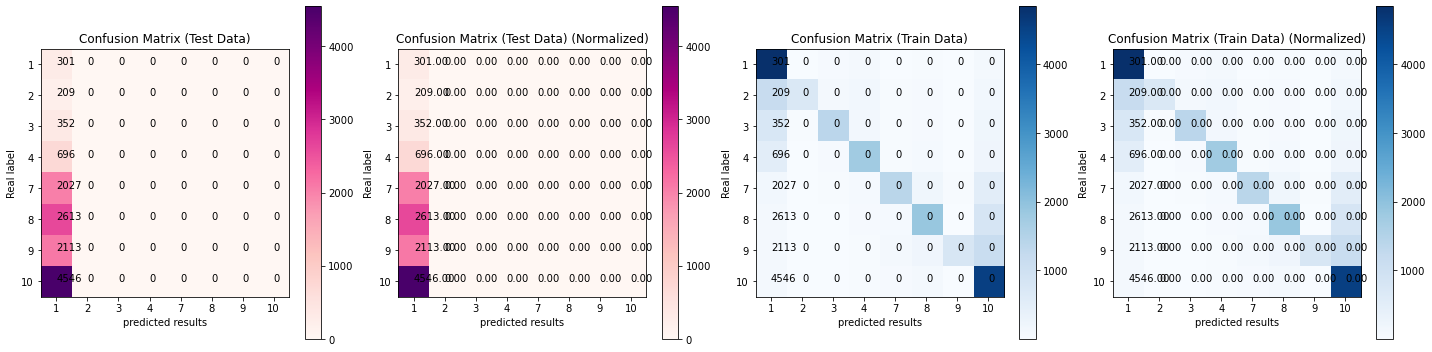

In [61]:
cm = confusion_matrix(y_test, Y_hat, labels=[1,2,3,4,7,8,9,10])
cm2 = confusion_matrix(y_train, predictionY, labels=[1,2,3,4,7,8,9,10])

plt.figure(figsize=(20,5))
plt.subplot(141)
plot_matrix(cm, classes=[1,2,3,4,7,8,9,10], normalized= False, title='Confusion Matrix (Test Data)', cmap='RdPu')
plt.subplot(142)
plot_matrix(cm, classes=[1,2,3,4,7,8,9,10], normalized= True, title='Confusion Matrix (Test Data) (Normalized)', cmap='RdPu')
plt.subplot(143)
plot_matrix(cm2, classes=[1,2,3,4,7,8,9,10], normalized= False, title='Confusion Matrix (Train Data)')
plt.subplot(144)
plot_matrix(cm2, classes=[1,2,3,4,7,8,9,10], normalized= True, title='Confusion Matrix (Train Data) (Normalized)')